In [1]:
### Chargement et Exploration des Données :

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Chargement du dataset
df = pd.read_csv('DATA/BostonHousing.csv')

# Affichage des premières lignes du dataset
print(df.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [2]:
# Résumé statistique du dataset
print(df.describe())

             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [3]:
# Vérification des valeurs manquantes
print(df.isnull().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [4]:
# Séparation des variables indépendantes (X) et de la variable cible (y)
X = df.drop('medv', axis=1) # Toutes les colonnes sauf 'medv'
y = df['medv']

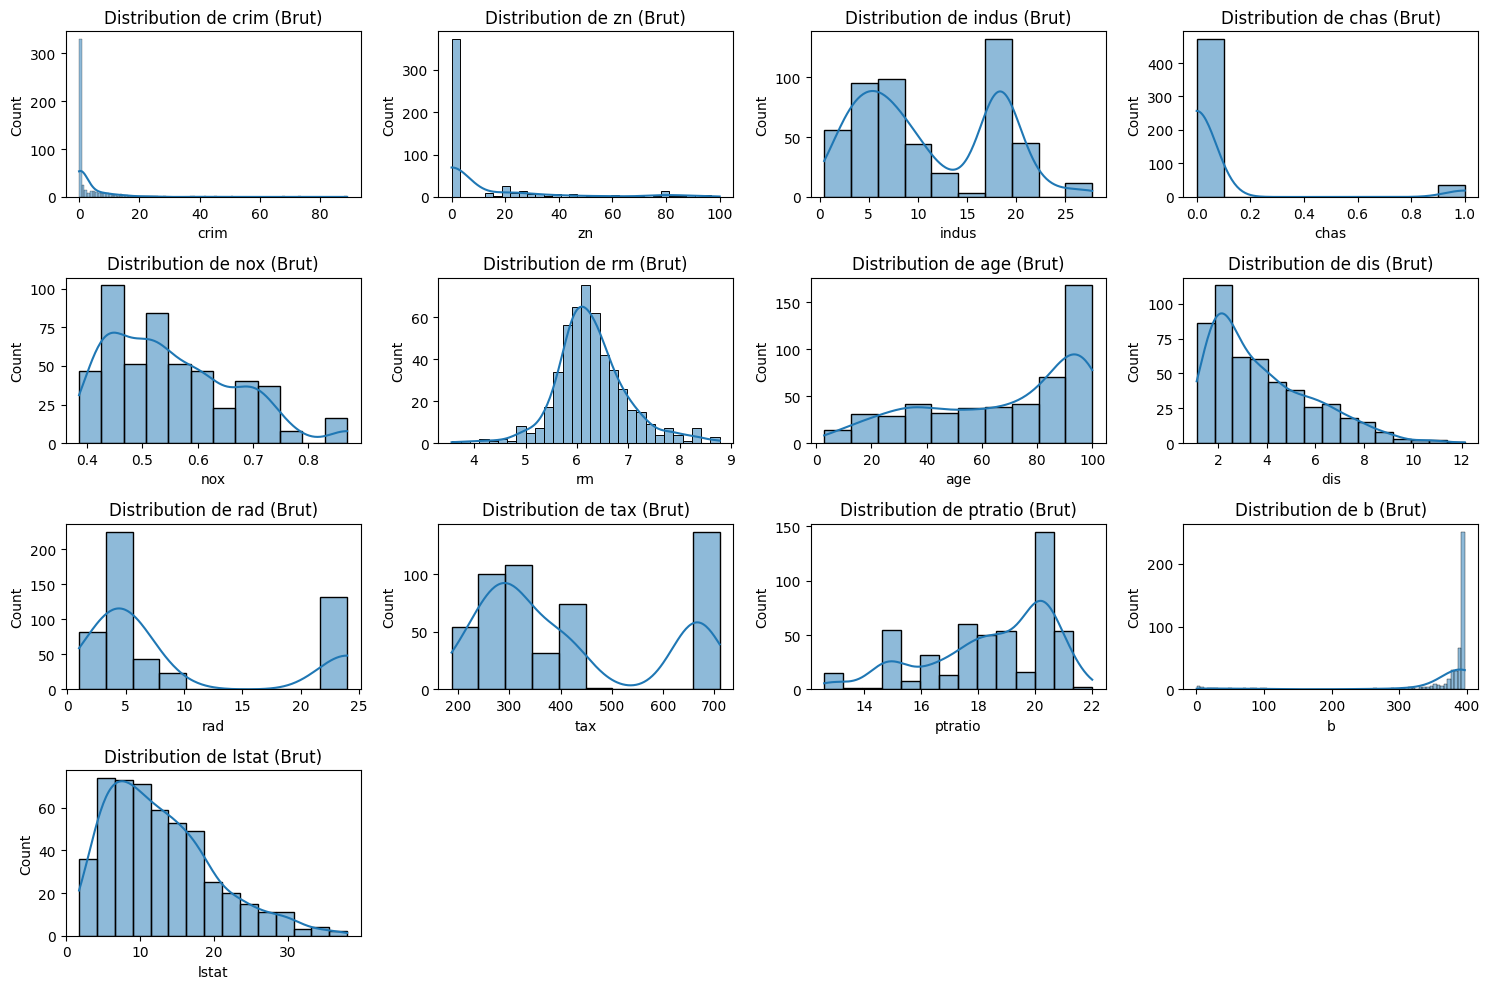

In [5]:
# Visualisation avant transformation
plt.figure(figsize=(15, 10))
for i, column in enumerate(X.columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(X[column], kde=True)
    plt.title(f"Distribution de {column} (Brut)")
    plt.tight_layout()
plt.show()

In [6]:
# Normalisation : Mettre les valeurs sur une échelle [0,1]
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

In [7]:
# Standardisation : Centrer les données et les mettre sur une échelle de variance 1
from sklearn.preprocessing import StandardScaler
scaler_std = StandardScaler()
X_standardized = scaler_std.fit_transform(X)

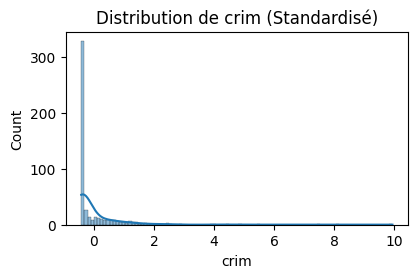

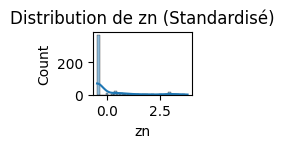

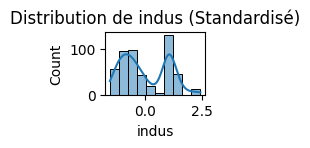

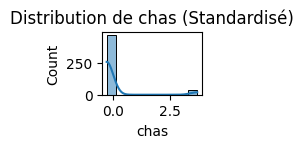

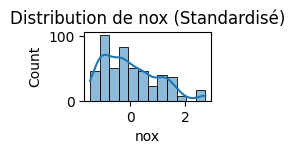

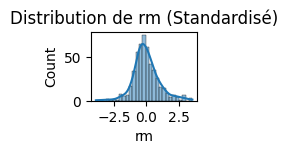

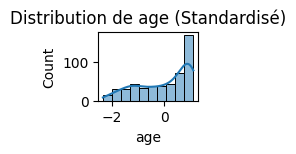

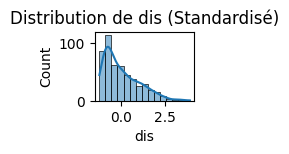

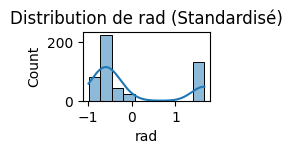

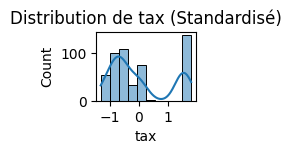

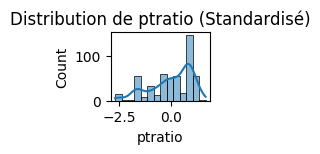

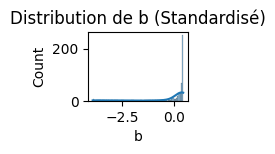

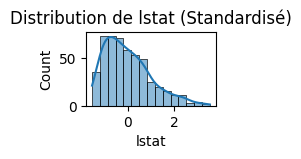

In [8]:
### Visualisation après transformation
# Convertir en DataFrame pour faciliter la visualisation
X_standardized_df = pd.DataFrame(X_standardized, columns=X.columns)

plt.figure(figsize=(15, 10))
for i, column in enumerate(X_standardized_df.columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(X_standardized_df[column], kde=True)
    plt.title(f"Distribution de {column} (Standardisé)")
    plt.tight_layout()
    plt.show()

In [9]:
# Séparation du dataset en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2,
random_state=42)

In [10]:
#Régression Linéaire :

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Modèle de régression linéaire
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Prédiction
y_pred_lr = model_lr.predict(X_test)

# Évaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Régression Linéaire - MSE: {mse_lr}, R2: {r2_lr}")

Régression Linéaire - MSE: 24.291119474973527, R2: 0.6687594935356318


In [11]:
#Régression avec Random Forest :

from sklearn.ensemble import RandomForestRegressor

# Modèle Random Forest
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

# Prédiction
y_pred_rf = model_rf.predict(X_test)

# Évaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - MSE: {mse_rf}, R2: {r2_rf}")

Random Forest - MSE: 7.9271453333333355, R2: 0.891903226702447


In [12]:
#Régression avec Support Vector Regressor (SVR) :
from sklearn.svm import SVR

# Modèle SVR
model_svr = SVR(kernel='linear')
model_svr.fit(X_train, y_train)

# Prédiction
y_pred_svr = model_svr.predict(X_test)

# Évaluation
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f"SVR - MSE: {mse_svr}, R2: {r2_svr}")

SVR - MSE: 28.898760946764135, R2: 0.6059284043264833


In [13]:
# Comparaison des résultats
print(f"Régression Linéaire - MSE: {mse_lr}, R2: {r2_lr}")
print(f"Random Forest - MSE: {mse_rf}, R2: {r2_rf}")
print(f"SVR - MSE: {mse_svr}, R2: {r2_svr}")

Régression Linéaire - MSE: 24.291119474973527, R2: 0.6687594935356318
Random Forest - MSE: 7.9271453333333355, R2: 0.891903226702447
SVR - MSE: 28.898760946764135, R2: 0.6059284043264833
